In [ ]:
#Import the required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix , classification_report

In [ ]:
#Read the Dataset
df = pd.read_csv('/content/drive/MyDrive/full_gen_data - full_gen_data.csv')
df.head()

,country,article,sales,regular_price,current_price,ratio,retailweek,promo1,promo2,customer_id,...,style,sizes,gender,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label
0,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003,...,slim,"xxs,xs,s,m,l,xl,xxl",women,205,104,57,255,187,255,0
1,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003,...,regular,"xxs,xs,s,m,l,xl,xxl",women,188,238,104,255,187,255,0
2,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003,...,regular,"xxs,xs,s,m,l,xl,xxl",women,205,173,0,255,187,255,0
3,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003,...,regular,"xxs,xs,s,m,l,xl,xxl",kids,205,140,149,164,211,238,0
4,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003,...,regular,"xxs,xs,s,m,l,xl,xxl",women,138,43,226,164,211,238,0


# Discover the Dataset and make EDA

In [ ]:
df=df.drop(['article','sizes','customer_id'],axis=1)

In [ ]:
print(df.columns)
print(df.shape)

Index(['country', 'sales', 'regular_price', 'current_price', 'ratio',
       'retailweek', 'promo1', 'promo2', 'article.1', 'productgroup',
       'category', 'cost', 'style', 'gender', 'rgb_r_main_col',
       'rgb_g_main_col', 'rgb_b_main_col', 'rgb_r_sec_col', 'rgb_g_sec_col',
       'rgb_b_sec_col', 'label'],
      dtype='object')
(100000, 21)


In [ ]:
# Descriptive statistics and Information
display(df.describe().T,print(),df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   country         100000 non-null  object 
 1   sales           100000 non-null  int64  
 2   regular_price   100000 non-null  float64
 3   current_price   100000 non-null  float64
 4   ratio           100000 non-null  float64
 5   retailweek      100000 non-null  object 
 6   promo1          100000 non-null  int64  
 7   promo2          100000 non-null  int64  
 8   article.1       100000 non-null  object 
 9   productgroup    100000 non-null  object 
 10  category        100000 non-null  object 
 11  cost            100000 non-null  float64
 12  style           100000 non-null  object 
 13  gender          100000 non-null  object 
 14  rgb_r_main_col  100000 non-null  int64  
 15  rgb_g_main_col  100000 non-null  int64  
 16  rgb_b_main_col  100000 non-null  int64  
 17  rgb_r_sec_

,count,mean,std,min,25%,50%,75%,max
sales,100000.0,56.781800,87.934743,1.000000,10.000000,26.000000,64.000000,898.00
regular_price,100000.0,52.391200,35.272128,3.950000,25.950000,40.950000,79.950000,197.95
current_price,100000.0,28.290800,22.578343,1.950000,11.950000,20.950000,37.950000,195.95
ratio,100000.0,0.545646,0.194363,0.296482,0.354839,0.525044,0.699248,1.00
promo1,100000.0,0.061900,0.240975,0.000000,0.000000,0.000000,0.000000,1.00
promo2,100000.0,0.004900,0.069829,0.000000,0.000000,0.000000,0.000000,1.00
cost,100000.0,6.517000,3.914728,1.290000,2.290000,6.950000,9.600000,13.29
rgb_r_main_col,100000.0,161.400000,39.790147,79.000000,138.000000,160.000000,205.000000,205.00
rgb_g_main_col,100000.0,139.600000,63.641814,26.000000,104.000000,144.000000,181.000000,238.00
rgb_b_main_col,100000.0,133.500000,81.148727,0.000000,57.000000,143.000000,205.000000,250.00


None

None

In [ ]:
# Remove duplicates
df.drop_duplicates(inplace=True)
df.shape

(99955, 21)

In [ ]:
#check value counts
for i in df:
    i = df[i].value_counts()
    print (i)

Germany    49380
Austria    35130
France     15445
Name: country, dtype: int64
2      3073
1      3053
3      2950
4      2800
5      2680
       ... 
720      10
599      10
543      10
433      10
432      10
Name: sales, Length: 476, dtype: int64
26.95     3620
29.95     3155
30.95     3120
23.95     3103
62.95     2690
          ... 
11.95      130
197.95     120
68.95      120
59.95      110
141.95      90
Name: regular_price, Length: 123, dtype: int64
8.95      3650
9.95      3360
11.95     3230
13.95     3130
17.95     2930
          ... 
135.95      10
144.95      10
140.95      10
178.95      10
120.95      10
Name: current_price, Length: 141, dtype: int64
1.000000    1490
0.493671    1130
0.310345     830
0.332096     820
0.321486     760
            ... 
0.372442      10
0.431748      10
0.780099      10
0.705449      10
0.433018      10
Name: ratio, Length: 2721, dtype: int64
2015-11-22    1100
2016-12-25    1050
2015-09-27    1010
2016-05-15     980
2015-05-10     960
    

In [ ]:
# Validate data against business rules
# For example, check if sales and prices are within expected ranges

# Identify any implausible values
implausible_sales = df[df['sales'] < 0]

# Print implausible values
print(implausible_sales)

Empty DataFrame
Columns: [country, sales, regular_price, current_price, ratio, retailweek, promo1, promo2, article.1, productgroup, category, cost, style, gender, rgb_r_main_col, rgb_g_main_col, rgb_b_main_col, rgb_r_sec_col, rgb_g_sec_col, rgb_b_sec_col, label]
Index: []

[0 rows x 21 columns]


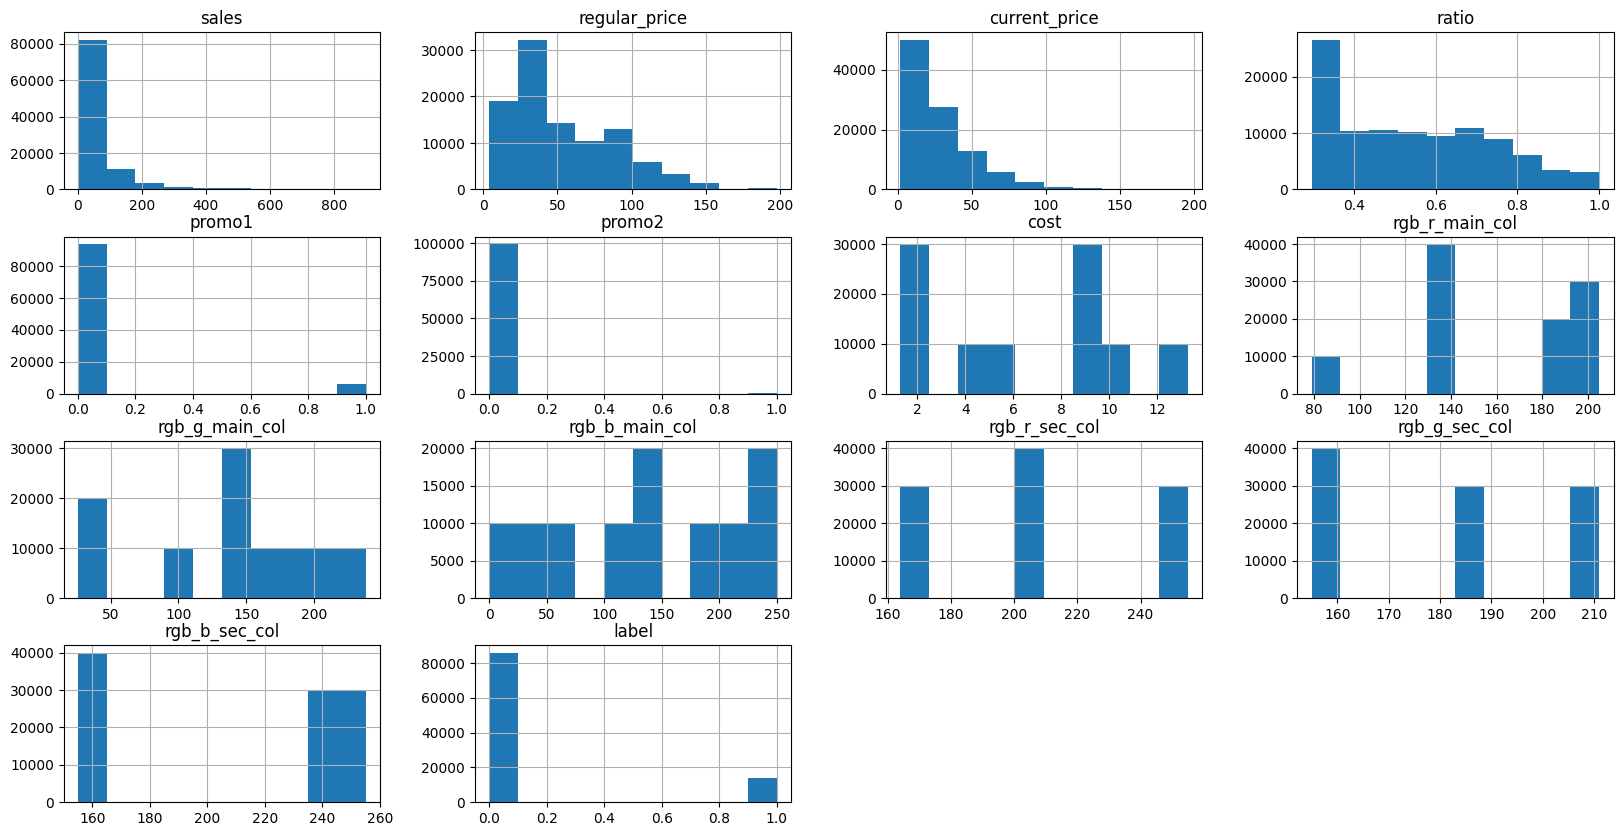

In [ ]:
# Visualize the distribution of numerical variables
df.hist(figsize=(20,10))
plt.show()

Like we see we have Imbalance in distribution of Features


 Let's check the Outlier

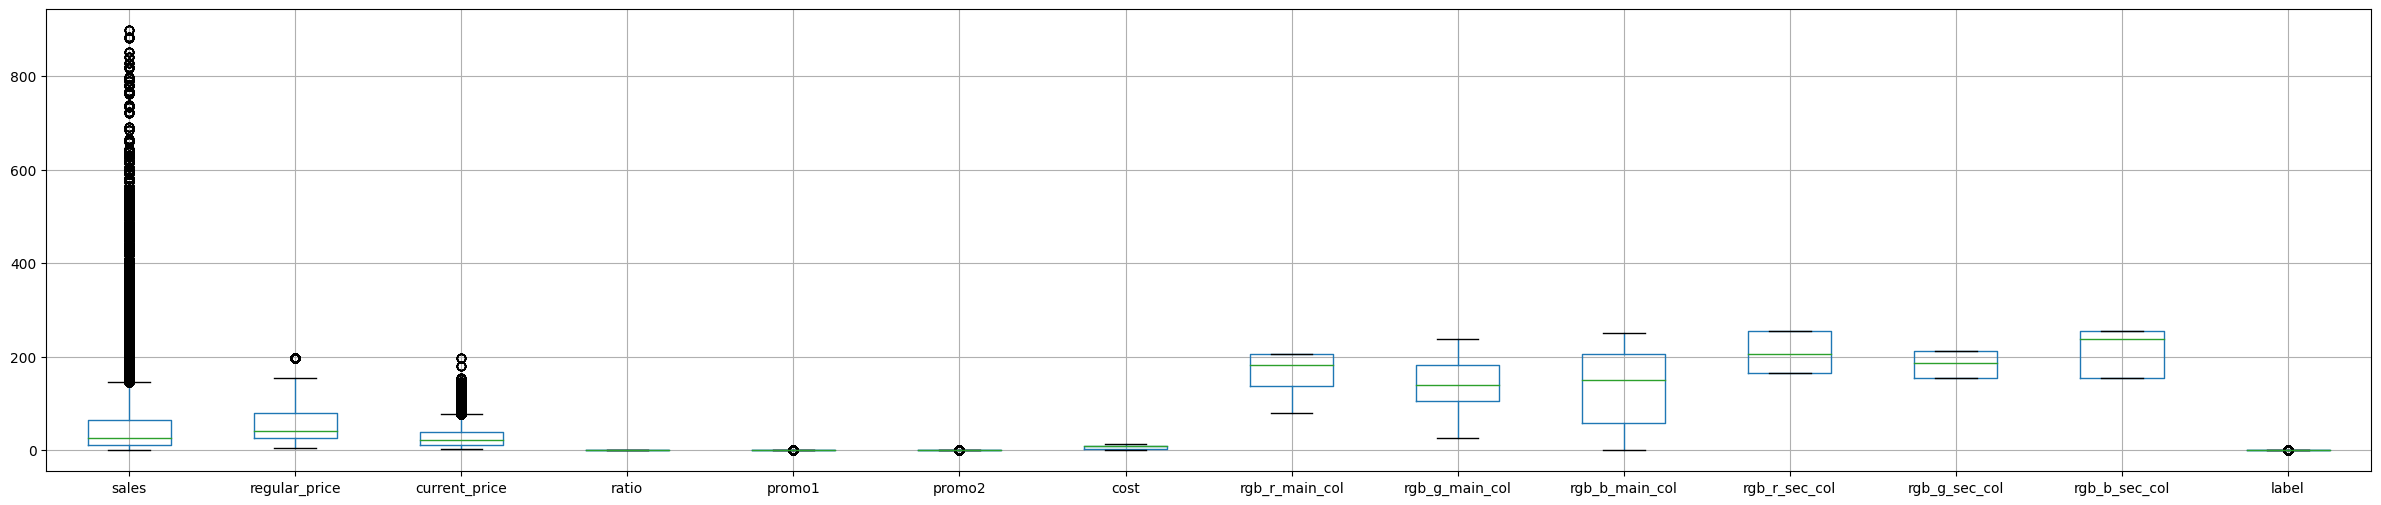

In [ ]:
# Box plots
df.boxplot(figsize=(30,6))
plt.show()

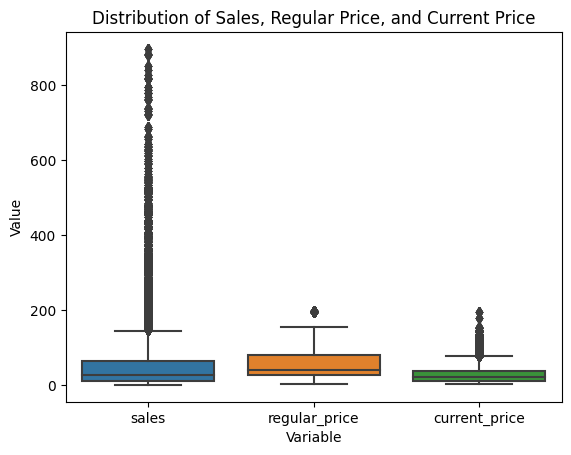

In [ ]:
# Create box plots of sales, regular_price, and current_price
sns.boxplot(df[['sales', 'regular_price', 'current_price']])
plt.xlabel('Variable')
plt.ylabel('Value')
plt.title('Distribution of Sales, Regular Price, and Current Price')
plt.show()

In [ ]:
from scipy import stats

z_scores = stats.zscore(df['sales'])
threshold = 3
outliers = df['sales'][abs(z_scores) > threshold]
print (outliers.size)

2250


Like we see we have Outlier in sales


let's Check the correlation

<ipython-input-13-e1532d491592>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, linewidths=0.2, annot_kws={'size':10})


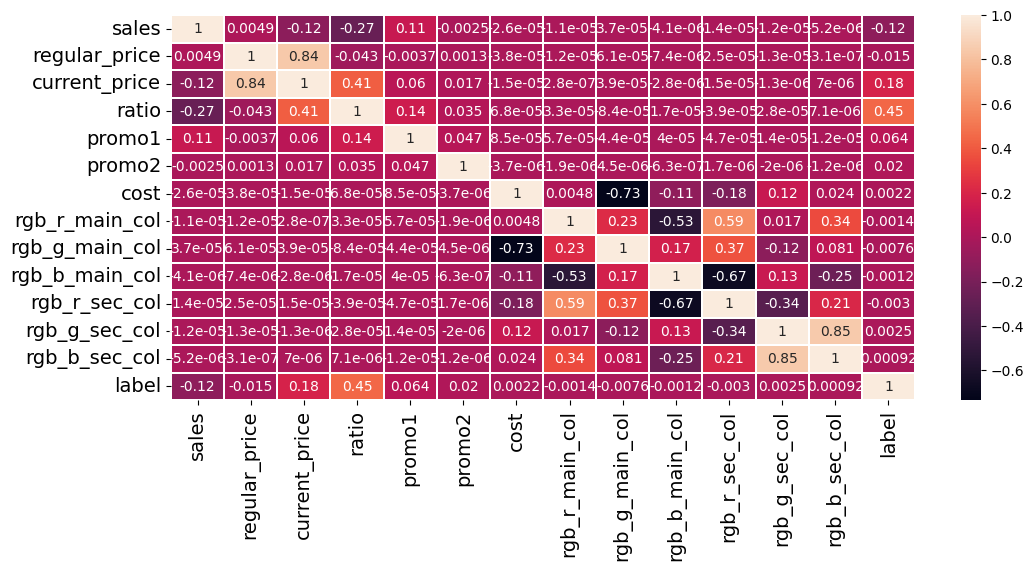

In [ ]:
sns.heatmap(df.corr(), annot=True, linewidths=0.2, annot_kws={'size':10})
fig = plt.gcf()
fig.set_size_inches(12,5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

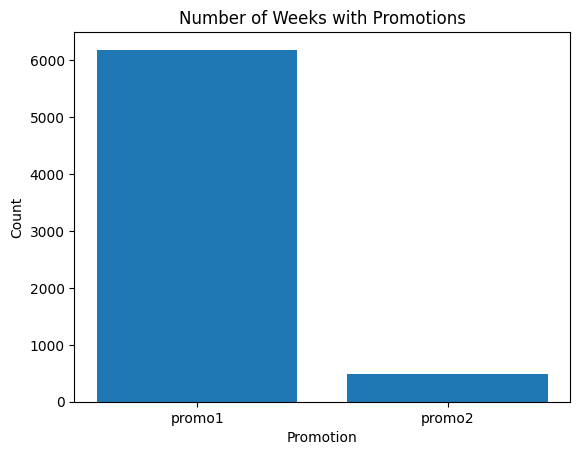

In [ ]:
# Count the number of promotions
promo_counts = df[['promo1', 'promo2']].sum()

# Plot bar chart of promotion counts
plt.bar(promo_counts.index, promo_counts.values)
plt.xlabel('Promotion')
plt.ylabel('Count')
plt.title('Number of Weeks with Promotions')
plt.show()

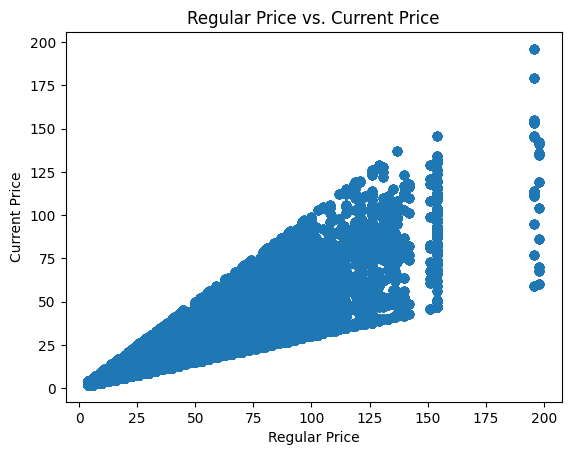

In [ ]:
# Plot scatter plot of regular_price vs. current_price
plt.scatter(df['regular_price'], df['current_price'])
plt.xlabel('Regular Price')
plt.ylabel('Current Price')
plt.title('Regular Price vs. Current Price')
plt.show()

<Axes: xlabel='productgroup', ylabel='count'>

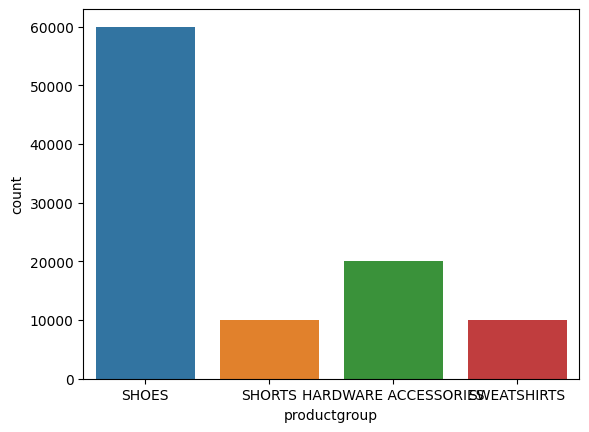

In [ ]:
sns.countplot(df, x='productgroup')

<Axes: xlabel='style', ylabel='count'>

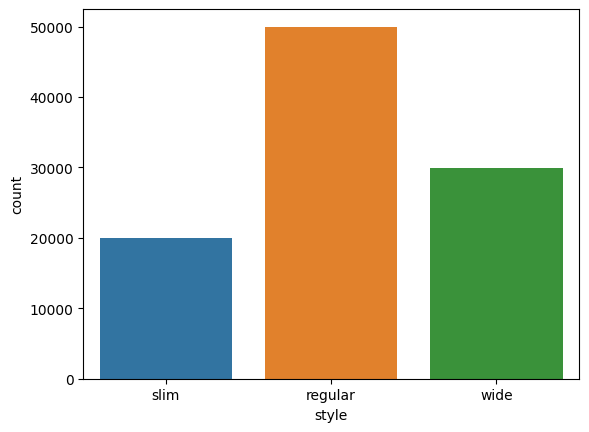

In [ ]:
sns.countplot(df, x='style')

<Axes: xlabel='label', ylabel='count'>

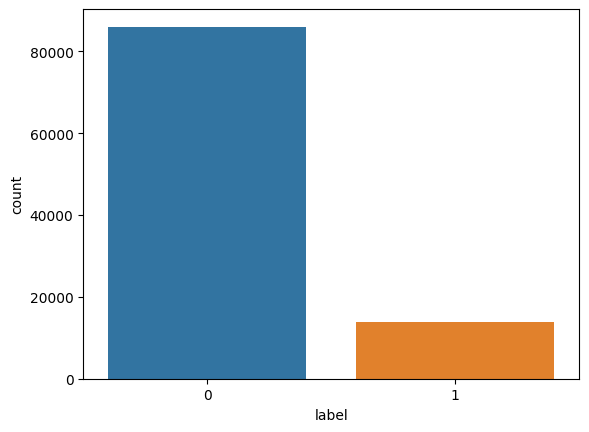

In [ ]:
sns.countplot(df, x='label')

We have Imbalance in label

<ipython-input-19-da25bc204d86>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_by_gender = df.groupby((df['gender'])).sum()['sales']


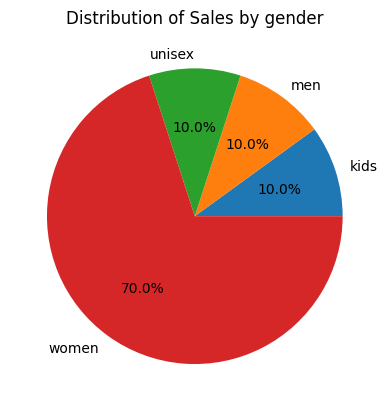

In [ ]:
# Group data by color gender range and calculate total sales
sales_by_gender = df.groupby((df['gender'])).sum()['sales']

# Create a pie chart
plt.pie(sales_by_gender, labels=sales_by_gender.index, autopct='%1.1f%%')
plt.title('Distribution of Sales by gender')
plt.show()

As we see The Women is the most gender in buying by 77.8%

Men and kids share the rest equally by 11.1%

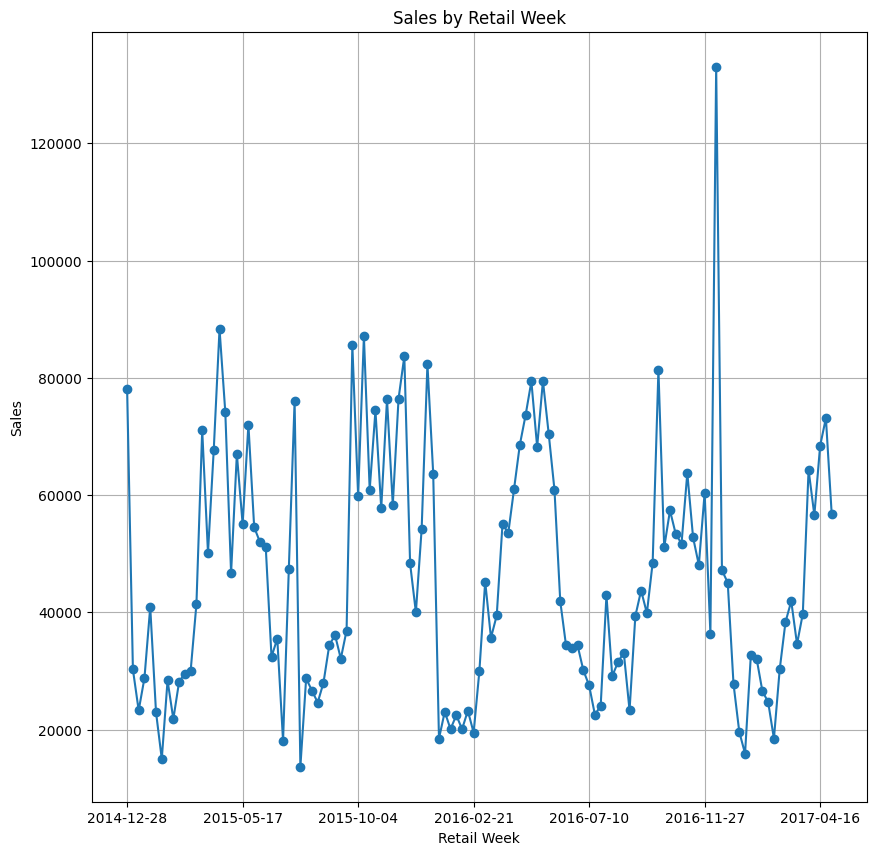

In [ ]:
# Group the data by RetailWeek and calculate the sum of Sales
sales_by_retailweek = df.groupby('retailweek')['sales'].sum()

# Plot the sales by retail week
plt.figure(figsize=(10,10))
sales_by_retailweek.plot(marker='o')
plt.xlabel('Retail Week')
plt.ylabel('Sales')
plt.title('Sales by Retail Week')
plt.grid(True)
plt.show()

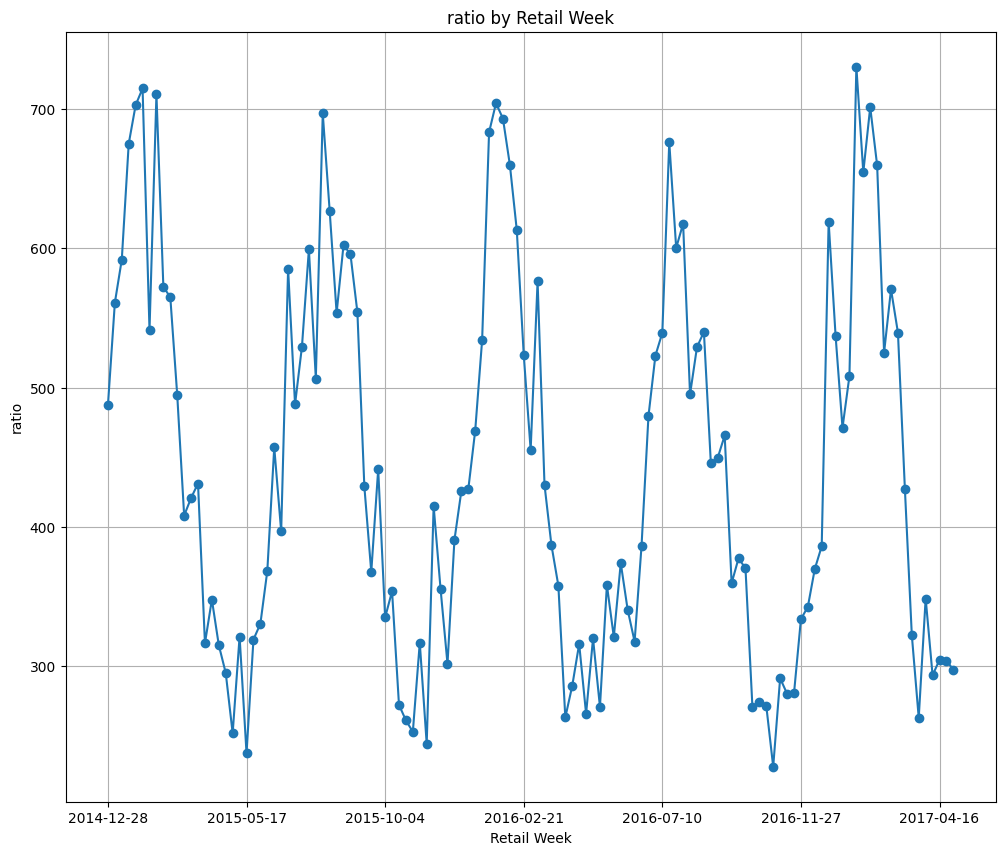

In [ ]:
# Group the data by RetailWeek and calculate the sum of Sales
ratio_by_retailweek = df.groupby('retailweek')['ratio'].sum()

# Plot the ratio by retail week
plt.figure(figsize=(12,10))
ratio_by_retailweek.plot(marker='o')
plt.xlabel('Retail Week')
plt.ylabel('ratio')
plt.title('ratio by Retail Week')
plt.grid(True)
plt.show()

After we compared the sales with discount's ratio and retailweek we discovered that there is a directly relation between discount and sales related to time
the week of the most sales has the most discount and vice versa

In [ ]:
df['rgb_main']=df['rgb_r_main_col']+df['rgb_g_main_col']+df['rgb_b_main_col']

df['rgb_main'].head()

0    366
1    530
2    378
3    494
4    407
Name: rgb_main, dtype: int64

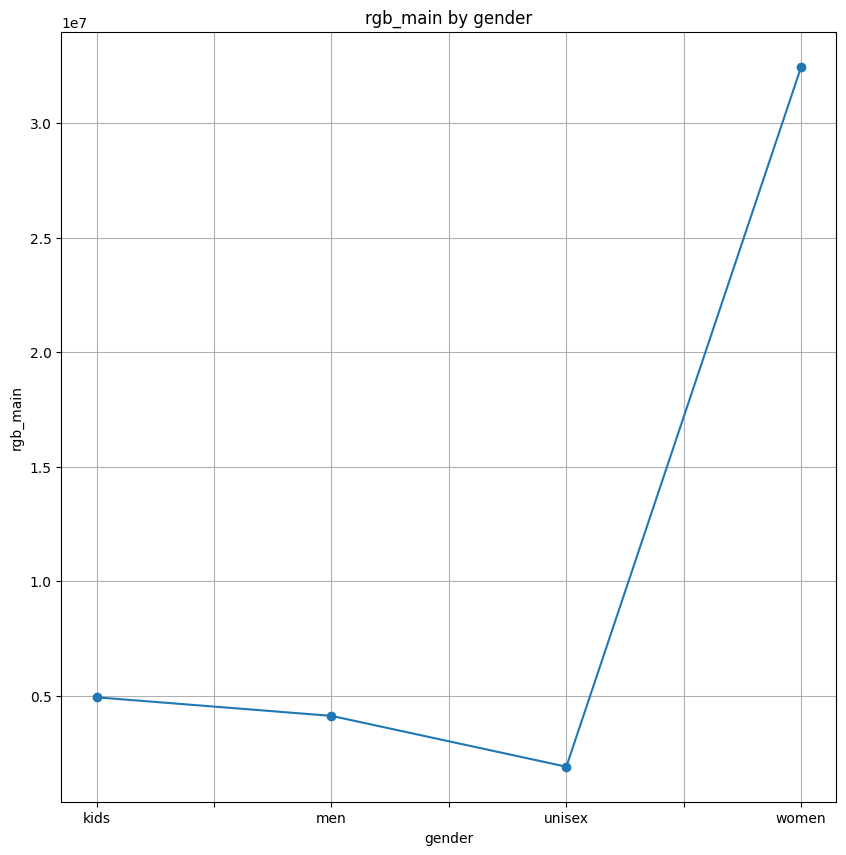

In [ ]:
# Group the data by RetailWeek and calculate the sum of Sales
rgb_gender = df.groupby('gender')['rgb_main'].sum()

# Plot the sales by retail week
plt.figure(figsize=(10,10))
rgb_gender.plot(marker='o')
plt.xlabel('gender')
plt.ylabel('rgb_main')
plt.title('rgb_main by gender')
plt.grid(True)
plt.show()

In [ ]:
df['rgb_sec']=df['rgb_r_sec_col']+df['rgb_g_sec_col']+df['rgb_b_sec_col']
df['rgb_sec'].head()

0    697
1    697
2    697
3    613
4    613
Name: rgb_sec, dtype: int64

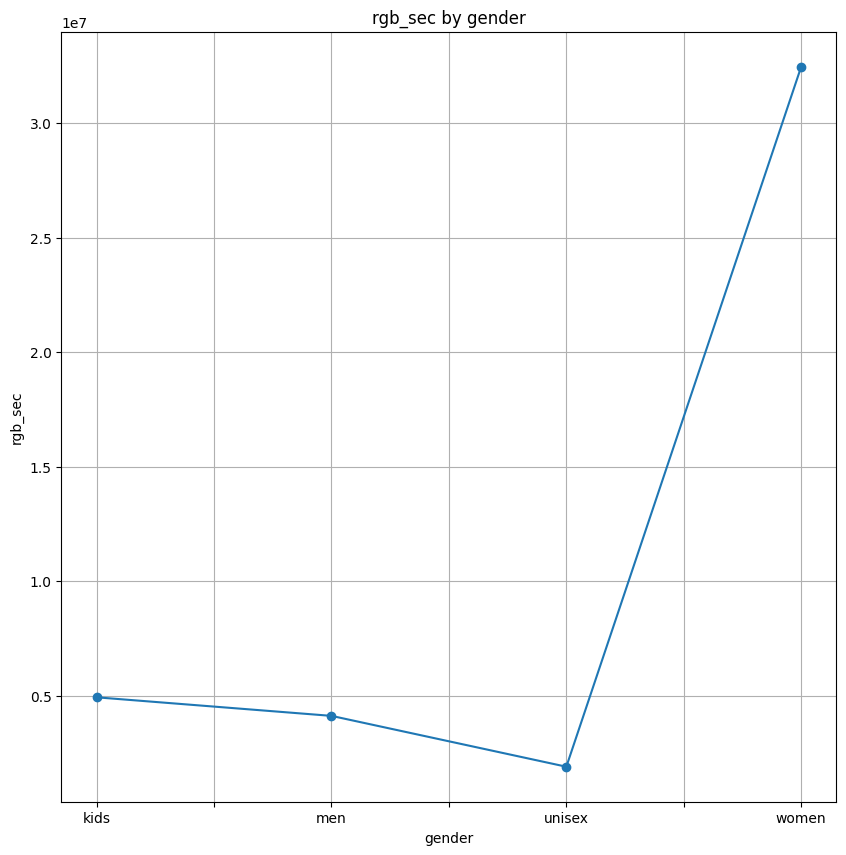

In [ ]:
# Group the data by RetailWeek and calculate the sum of Sales
rgb_sec_gender = df.groupby('gender')['rgb_sec'].sum()

# Plot the sales by retail week
plt.figure(figsize=(10,10))
rgb_gender.plot(marker='o')
plt.xlabel('gender')
plt.ylabel('rgb_sec')
plt.title('rgb_sec by gender')
plt.grid(True)
plt.show()

In [ ]:
df=df.drop(['rgb_sec','rgb_main'],axis=1)


As we discovered that the most gender affected by the color is women then kids then men

#Date Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder
df = df.apply(LabelEncoder().fit_transform)
df.head()

,country,sales,regular_price,current_price,ratio,retailweek,promo1,promo2,article.1,productgroup,...,cost,style,gender,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label
0,2,27,2,2,1667,65,0,0,6,1,...,9,1,3,6,2,2,2,1,2,0
1,2,27,2,2,1667,65,0,0,1,2,...,2,0,3,5,9,3,2,1,2,0
2,2,27,2,2,1667,65,0,0,2,0,...,1,0,3,6,6,0,2,1,2,0
3,2,27,2,2,1667,65,0,0,5,1,...,6,0,0,6,4,5,0,2,1,0
4,2,27,2,2,1667,65,0,0,4,1,...,7,0,3,2,1,8,0,2,1,0


In [ ]:
# Separate features and labels
x = df.drop('label', axis=1)
y = df['label']

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the classes
smote = SMOTE()
x_resampled, y_resampled = smote.fit_resample(x, y)

# Create a new DataFrame with the resampled data
df_resampled = pd.concat([x_resampled, y_resampled], axis=1)

In [ ]:
#Apply StandardScaler to scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_resampled)

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# Define the classification models
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC(),
    KNeighborsClassifier()
]

# Train and evaluate each model
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model.__class__.__name__} Accuracy: {accuracy*100}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression Accuracy: 86.64458198936448
DecisionTreeClassifier Accuracy: 88.52759131723477
RandomForestClassifier Accuracy: 90.90169412721937
SVC Accuracy: 87.9783802632726
KNeighborsClassifier Accuracy: 88.05683898526719
